In [1]:
from RAG import RAG
import numpy as np
import matplotlib.pyplot as plt

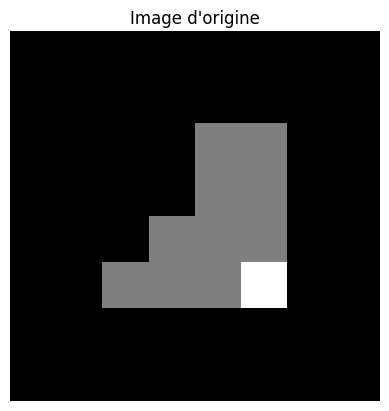

In [2]:
img = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 127, 127, 127, 0, 0],
    [0, 0, 127, 127, 127, 255, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
    ], dtype=int)

plt.title("Image d'origine")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

# Partie I : Division

In [3]:
# Instanciation du RAG
graphe = RAG(img)
# Construction de l'arbre
graphe.quad_tree()
graphe.print_quad_tree()
print("Le nombre de noeuds dans l'arbre :")
print(graphe.get_tree_size())

L'arbre de la division de l'image :
     ┌─ 1
     │     ┌─ 5
     ├─ 2 ─┼─ 6
     │     ├─ 7
     │     └─ 8
     │     ┌─ 9
     │     │      ┌─ 17
─ 0 ─┤     ├─ 10 ─┼─ 18
     ├─ 3 ─┤      ├─ 19
     │     │      └─ 20
     │     ├─ 11
     │     └─ 12
     │            ┌─ 21
     │     ┌─ 13 ─┼─ 22
     │     │      ├─ 23
     └─ 4 ─┤      └─ 24
           ├─ 14
           ├─ 15
           └─ 16
Le nombre de noeuds dans l'arbre :
25


[[  0 127]
 [127 127]]


(<matplotlib.image.AxesImage at 0x246707a7890>,
 (np.float64(-0.5), np.float64(1.5), np.float64(1.5), np.float64(-0.5)))

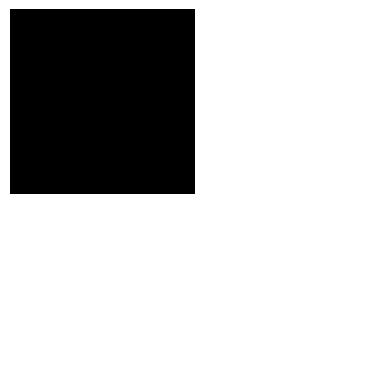

In [4]:
tree = graphe.get_quad_tree()

sub_img_1 = graphe.get_sub_image_at(10)
print(sub_img_1)
plt.imshow(sub_img_1, cmap='gray'), plt.axis('off')

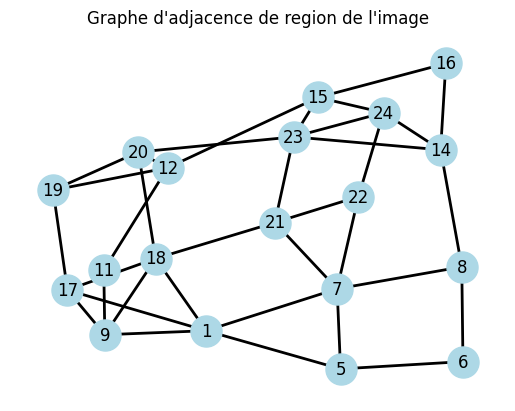

Le dictionnaire d'adjacence du RAG :
  1 : [18, 9, 5, 17, 7]
  5 : [7, 6, 1]
  6 : [8, 5]
  7 : [5, 22, 1, 8, 21]
  8 : [6, 14, 7]
  9 : [17, 11, 1, 18]
 11 : [9, 12]
 12 : [19, 15, 20, 11]
 14 : [16, 24, 8, 23]
 15 : [24, 23, 12, 16]
 16 : [14, 15]
 17 : [9, 18, 1, 19]
 18 : [20, 17, 1, 9, 21]
 19 : [12, 20, 17]
 20 : [18, 23, 19, 12]
 21 : [22, 18, 23, 7]
 22 : [21, 7, 24]
 23 : [20, 15, 24, 21, 14]
 24 : [15, 23, 14, 22]


In [62]:
# Construction du graphe
graphe.build_RAG()

# Dessin du graphe
graphe.plot_graph()

# La représentation du graphe sous forme de dictionnaire d'adjacence
# Utile pour la 2eme partie (fusion)
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    if adj_dict[vertex] == []:
        continue
    print(f"{vertex:3} : {adj_dict[vertex]}")

In [21]:
print(tree.value[0])

[0]


In [80]:
def can_merge(adj_dict, i, homogeneity=graphe.homogeneity_merge):
    out = []    
    for j in adj_dict[i]:
        if j in adj_dict:
            if homogeneity(graphe.get_sub_image_at(i), graphe.get_sub_image_at(j), thresh=10):
                out.append(j)
    return out  

def merge(adj_dict, i, j):
    if not (j in graphe.get_node(tree, str(i)).value[0]):
        graphe.get_node(tree, str(i)).value[0].append(j)
    if i in adj_dict[j]:
        adj_dict[j].remove(i)
    adj_dict[i].extend(adj_dict[j])
    adj_dict[i] = list(set(adj_dict[i]))
    tmp = graphe.edges_contains_vertex(graphe.edges_, j)
    graphe.edges_ = list(set(graphe.get_edges()) - set(tmp))
    #graphe.get_node(tree, str(j)).value[0] = []
    adj_dict.pop(j)

def merge_all(adj_dict, i):
    merge_list = can_merge(adj_dict, i)
    while merge_list != []:
        for j in merge_list:
            merge(adj_dict, i, j)
        merge_list = can_merge(adj_dict, i)

merge_all(adj_dict, 1)
merge_all(adj_dict, 7)
merge_all(adj_dict, 24)
    
for vertex in adj_dict:
    if adj_dict[vertex] == []:
        continue
    print(f"{vertex:3} : {adj_dict[vertex]}")

  1 : [5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 23, 24]
  7 : [1, 5, 8, 9, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24]
 24 : [15, 23, 14, 22]


{1, 5, 6, 8, 9, 11, 12, 14, 15, 16, 17}
{7, 18, 19, 20, 21, 22, 23}


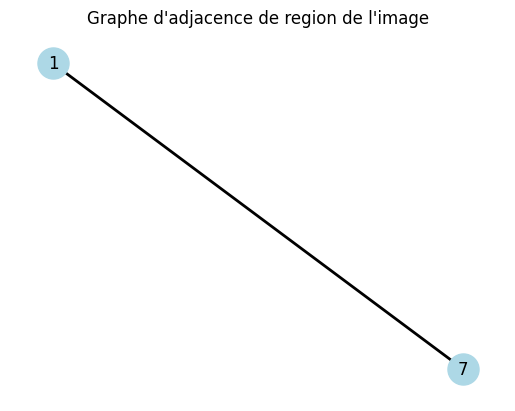

In [81]:
print(set(graphe.get_node(tree, "1").value[0]))
print(set(graphe.get_node(tree, "7").value[0]))
graphe.plot_graph()